# TransKit

*your personal digital endocrinologist*
(though I don't want to overpromise!)

TransKit is a project to help you keep track of your hormonal transition.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys

%matplotlib inline
from matplotlib import pyplot as plt

from injectio import pharma, injectables, fit

## Sample Transition

In [27]:
import data.transition_sample as ts

ts_injections = pharma.createInjections(np.array(ts.injections))
ts_estradiol_measurements = pharma.createMeasurements(np.array(ts.estradiol_measurements))

### Calibration

In [28]:
_, ts_ec_cali = fit.calibrateInjections_lsqpoly(
    ts_injections,
    injectables.injectables,
    "ec",
    ts_estradiol_measurements)

calibrated_injectables = dict(injectables.injectables)
calibrated_injectables["ec"] = injectables.calibratedInjection(
    calibrated_injectables["ec"],
    ts_ec_cali)

with np.printoptions(precision=9, suppress=True, floatmode='fixed'):
    print(f"ts_ec_cali = np.{repr(ts_ec_cali)}")

ts_ec_cali = np.array([0.000000000, 0.226810579])


### Plotting

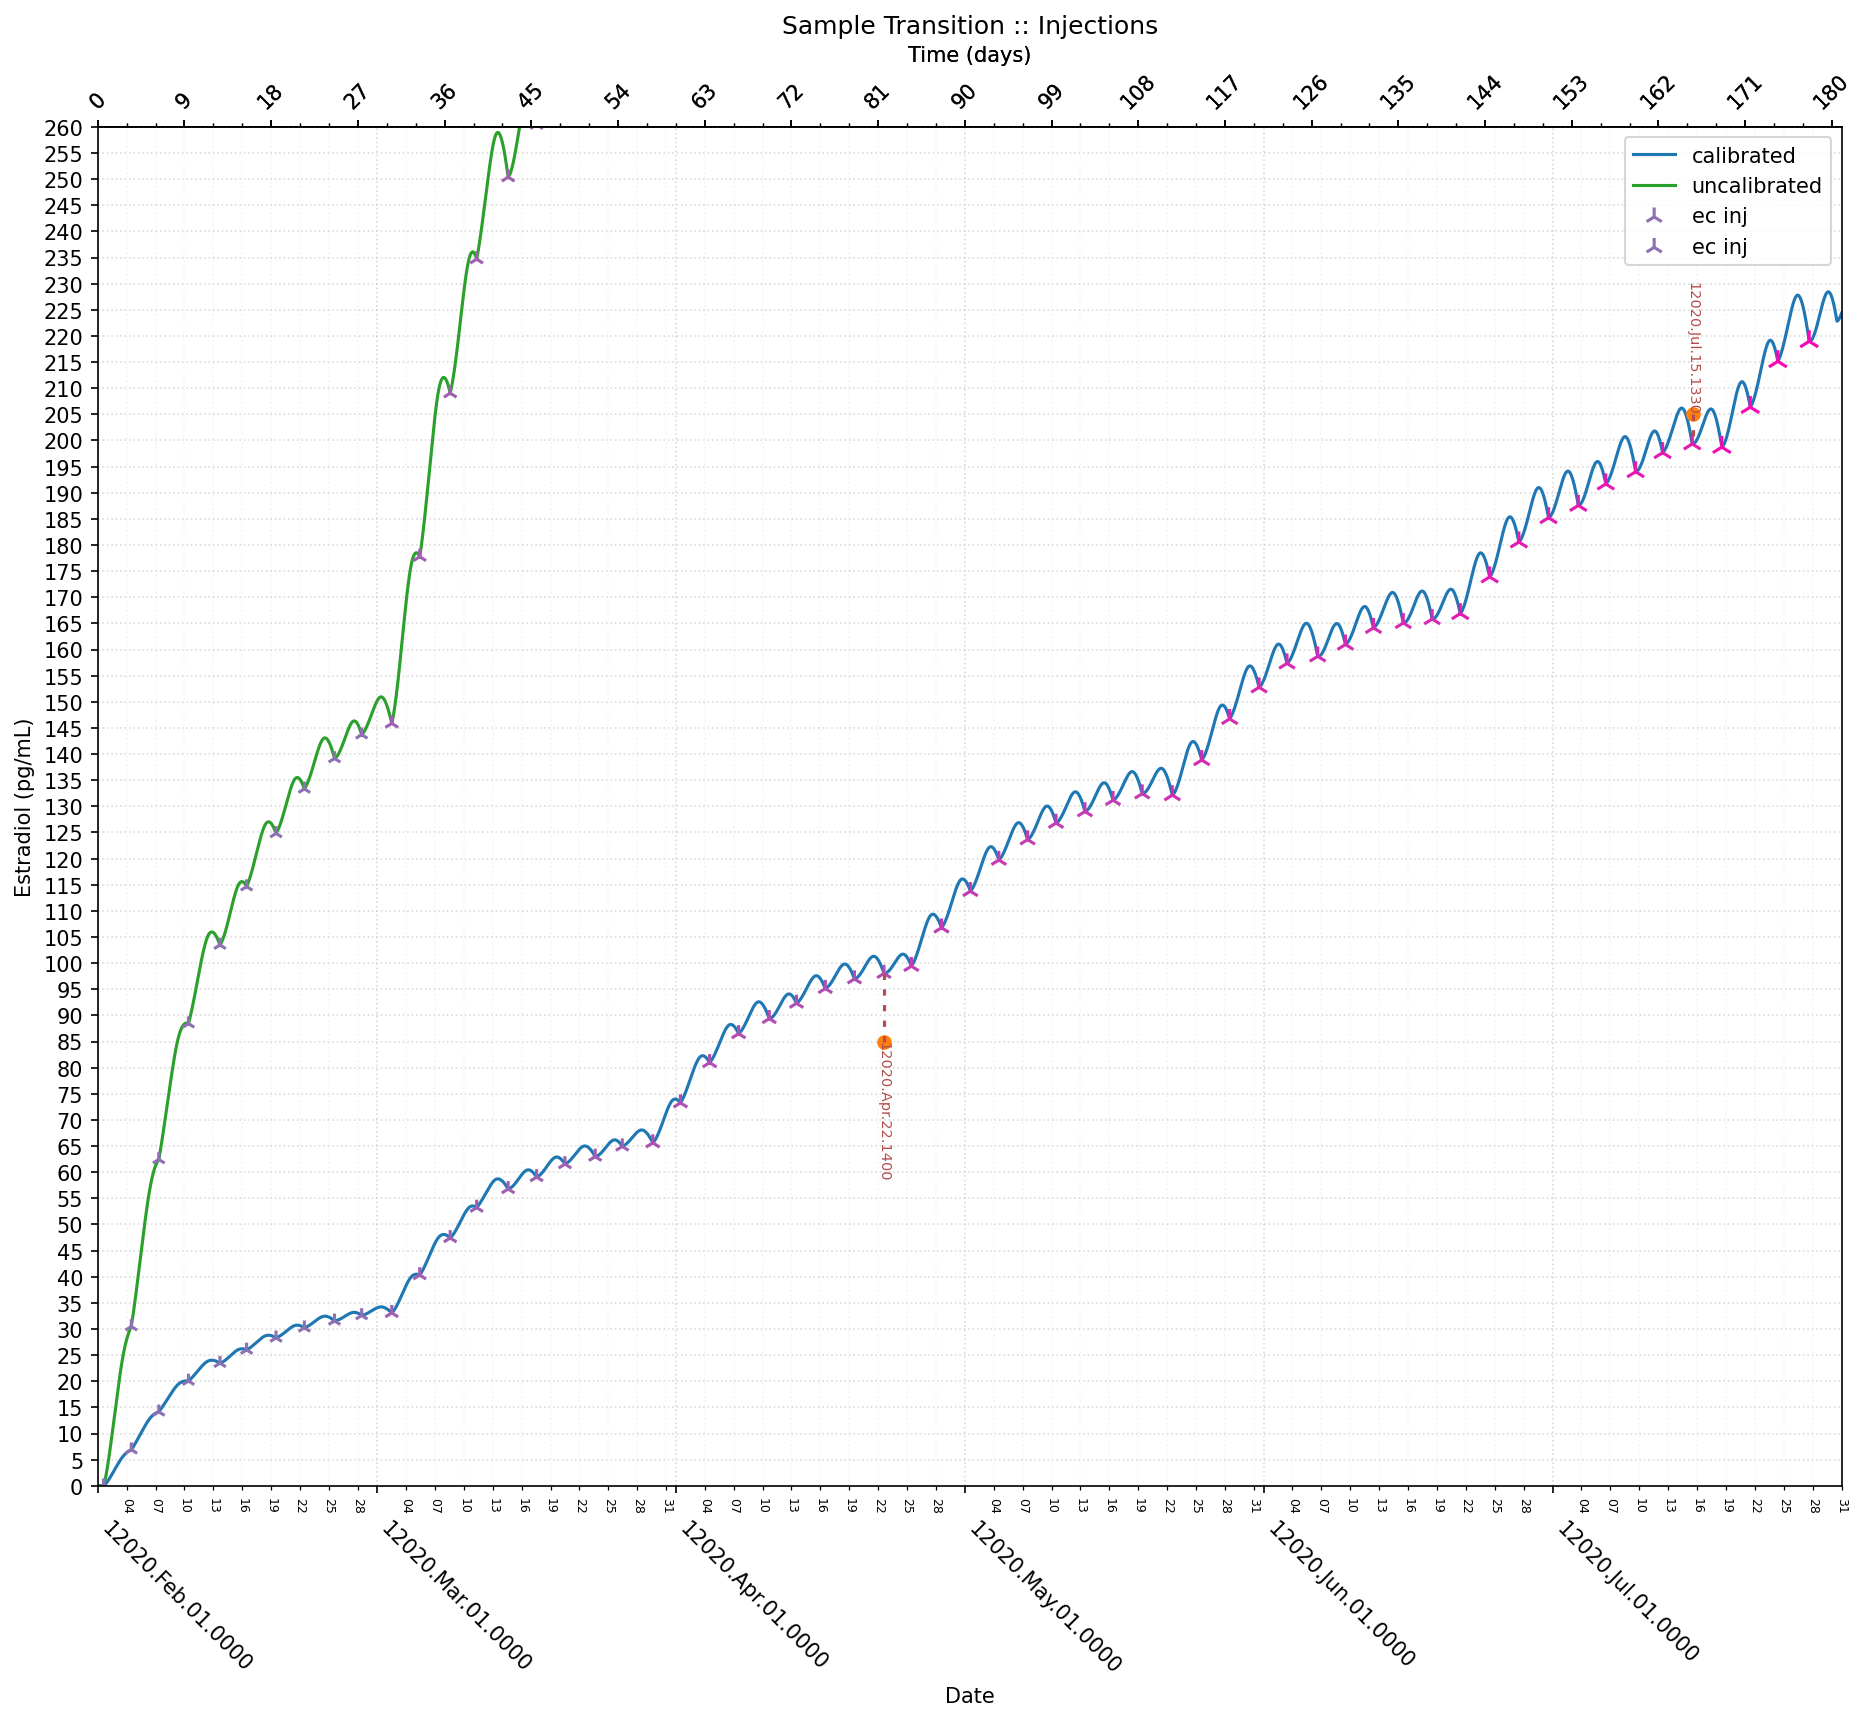

In [29]:
fig,ax = pharma.startPlot()
ax.set_title('Sample Transition :: Injections')
ax.set_ylim(bottom=0, top=260)
ax.set_yticks(range(0, 261, 5))
pharma.plotInjections(
    fig, ax,
    ts_injections,
    calibrated_injectables,
    estradiol_measurements=ts_estradiol_measurements,
    label="calibrated")
pharma.plotInjections(
    fig, ax,
    ts_injections,
    injectables.injectables,
    label="uncalibrated")